In [511]:
# Download a static FFmpeg build and add it to PATH.
exist = !which ffmpeg
if not exist:
  !curl https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz -o ffmpeg.tar.xz \
     && tar -xf ffmpeg.tar.xz && rm ffmpeg.tar.xz
  ffmdir = !find . -iname ffmpeg-*-static
  path = %env PATH
  path = path + ':' + ffmdir[0]
  %env PATH $path
print('')
!which ffmpeg
print('Done!')


/opt/homebrew/bin/ffmpeg
Done!


In [512]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [513]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [514]:
# Import all the libraries needed for the project
import numpy as np
import wave
import math
import pandas as pd
import sklearn as sk
import matplotlib.pylab as plt
from pydub import AudioSegment
import librosa as lb
from scipy import stats

In [515]:
# Load the sound file
filename = "office_theme.wav"
y, sr = lb.load(filename)

# y : time series represented as a one-dimensional NumPy floating point array
print(y)

print()

# sr : the number of samples per second of audio
print(sr)

[ 1.0945390e-04  3.0455931e-06 -1.4885447e-05 ...  4.8284943e-05
  5.5056003e-05  0.0000000e+00]

22050


In [516]:
tempo, beat_frames = lb.beat.beat_track(y=y, sr=sr)
beat_times = lb.frames_to_time(beat_frames, sr=sr)

# bpm : beats per minute
print(tempo)

print()

# beat_times : the times that divide the beats in the song
print(beat_times)

172.265625

[ 0.9752381   1.32353741  1.69505669  2.04335601  2.41487528  2.7631746
  3.13469388  3.4829932   3.83129252  4.17959184  4.55111111  4.89941043
  5.24770975  5.59600907  5.96752834  6.31582766  6.66412698  7.0124263
  7.38394558  7.7322449   8.08054422  8.42884354  8.80036281  9.14866213
  9.49696145  9.86848073 10.21678005 10.56507937 10.93659864 11.261678
 11.63319728 11.9814966  12.35301587 12.70131519 13.04961451 13.42113379
 13.76943311 14.11773243 14.46603175 14.83755102 15.18585034 15.53414966
 15.88244898 16.25396825 16.60226757 16.95056689 17.29886621 17.67038549
 18.01868481 18.36698413 18.7385034  19.08680272 19.43510204 19.78340136
 20.13170068 20.50321995 20.85151927 21.19981859 21.57133787 21.91963719
 22.26793651 22.63945578 22.96453515 23.33605442 23.68435374 24.03265306
 24.40417234 24.75247166 25.12399093 25.47229025 25.82058957 26.16888889
 26.54040816 26.88870748 27.26022676 27.60852608 27.9568254  28.30512472
 28.65342404 29.00172336 29.37324263 29.721

In [517]:
# Assign values the pitches and magnitudes variable

pitches, magnitudes = lb.piptrack(y=y, sr=sr)
print("pitches: ", pitches)
print("magnitudes: ", magnitudes)

pitches:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
magnitudes:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [518]:
# STFT: Short-Time Fourier Transform
D = lb.stft(y)

# Get magnitude of STFT
s = np.abs(lb.stft(y)**2) 

# Chroma translates sound into numerical vectors
chroma = lb.feature.chroma_stft(S=s, sr=sr)
chroma

array([[0.9609415 , 0.8769099 , 0.8271437 , ..., 0.625243  , 0.59857315,
        0.60128915],
       [0.9829665 , 0.94965255, 0.818047  , ..., 0.46819255, 0.48761997,
        0.46049285],
       [0.88734764, 0.93363595, 0.80825865, ..., 0.53164107, 0.5448654 ,
        0.6915647 ],
       ...,
       [0.9204512 , 0.7646616 , 0.69425267, ..., 0.8204721 , 0.69989395,
        0.70040935],
       [0.89891267, 1.        , 0.85754997, ..., 0.6240555 , 0.48731667,
        0.6682058 ],
       [0.7736402 , 0.8408476 , 0.94460875, ..., 0.5902122 , 0.4729036 ,
        0.6375784 ]], dtype=float32)

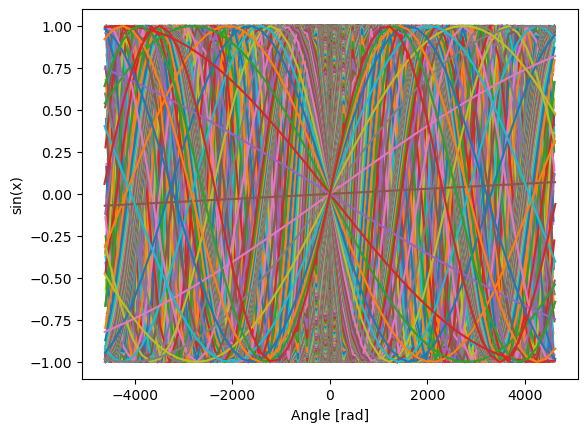

In [519]:
# Return the cumulative sum of the elements along a given axis
chroma = np.cumsum(chroma)

# Plot the sounds and their decibals
x = np.linspace(-chroma, chroma)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

[[0.61413294 0.6295817  0.60582054 ... 0.57086796 0.5736061  0.5899126 ]
 [0.70798135 0.6929879  0.6074266  ... 0.5863214  0.6139496  0.60734755]
 [0.72788125 0.73112047 0.69446295 ... 0.52704096 0.5401452  0.55055135]
 ...
 [0.5335205  0.48282093 0.54877496 ... 0.5697775  0.57535976 0.5473945 ]
 [0.95141613 1.         0.914375   ... 1.         1.         1.        ]
 [1.         0.9838628  1.         ... 0.8350611  0.8841912  0.8496701 ]]


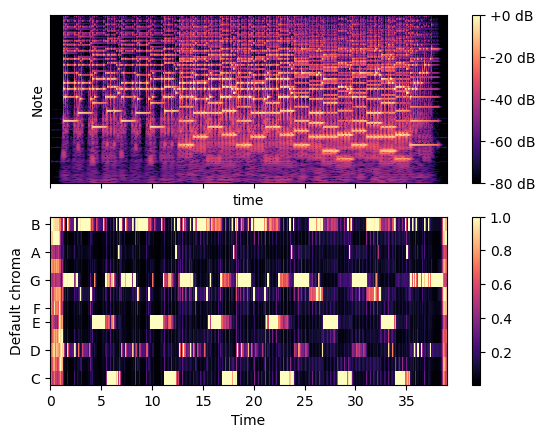

In [520]:
# Plot a chart that highlights when sounds are being played

chroma_orig = lb.feature.chroma_cqt(y=y, sr=sr)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = tuple([slice(None), slice(*list(lb.time_to_frames([0,39])))])

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(lb.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))
fig, ax = plt.subplots(nrows=2, sharex=True)


# In this code there are 2 visualizations
#   img1 : the first plot which is the decibal changes as the song progresses
#   ax[0] : re-sets the labels of the img1 plot
#   img2 : the second plot which categorizes by the notes and highlights when they are played
#   ax[1] = resets the labels of the img2 plot

img1 = lb.display.specshow(lb.amplitude_to_db(C, ref=np.max)[idx],
                                y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()
ax[0].set(xlabel = 'time')
img2 = lb.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')
print(chroma_orig[idx])

In [521]:
# Contains the amount of a note being played at a certain time
note_concentration = chroma_orig[idx]

# Changes all the note values that were unneccesary to 0
for i in note_concentration:
    i[i < 0.9] = 0
    i[i >= 0.9] = 1
    
note_list = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
    
# Create a dictionary that assigns each note to its corresponding list of concentrations            
note_concentration = {"C":note_concentration[0], 
                      "C#":note_concentration[1], 
                      "D":note_concentration[2],  
                      "D#":note_concentration[3],  
                      "E":note_concentration[4],  
                      "F":note_concentration[5],  
                      "F#":note_concentration[6],
                      "G":note_concentration[7],
                      "G#":note_concentration[8],
                      "A":note_concentration[9],
                      "A#":note_concentration[10],
                      "B":note_concentration[11]
                     }


# This is important for later, but is used for the print-out of the score without bars 
# (I printed out a score with and without bars for reading ease)

without_bars = {"C":[], 
                      "C#":[], 
                      "D":[],  
                      "D#":[],  
                      "E":[],  
                      "F":[],  
                      "F#":[],
                      "G":[],
                      "G#":[],
                      "A":[],
                      "A#":[],
                      "B":[]
                     }
print(note_concentration)

{'C': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C#': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'D': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'D#': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'E': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'F': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'F#': array([0., 0., 0., ..., 0., 0., 1.], dtype=float32), 'G': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'G#': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'A': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'A#': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'B': array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)}


In [522]:
# Create the step var and groups var 
#    step: is the grouping of the sound in one beat and group
#    group: the number of step groups that exist

x = (173 * 0.39) * 4

step = math.ceil(len(note_concentration["C"]) / (441))
groups = math.ceil(len(note_concentration["C"]) / step)
print(step, groups)

4 420


In [523]:
# Function: classify_notes
# Description: finds the most prominent note in that beat
# input: NOTE (string) the letter of the note that will be classified
#    ie. "B", "C#", "D", "G"
# output: NA -> this function updates a global variable

def classify_notes(note):
    z = note_concentration[note]
    x = 0
    temp = []
    
    # iterate through the number of groups we created, we are combining the elements in each group to form one note
    for i in range(groups):
        if (x + step < len(z)):
            subset = z[x:x + step]
        else:
            subset = z[x:]
        mode = stats.mode(subset)
        mode_int = int(mode[0][0])
        temp.append(mode_int)
        x += step
    note_concentration[note] = temp

In [524]:
# Iterate through the keys and classify all the concentrations in that key
for i in note_concentration.keys():
    classify_notes(i)

/var/folders/c2/1db30_f555xbrgrjbfzbhkn40000gn/T/ipykernel_65098/1496360041.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(subset)


In [525]:
# Print out all the compressed / classified notes
print("\n".join("{!r}: {!r},".format(k, v) for k, v in note_concentration.items()))

'C': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [526]:
# Function: dashed_list
# Description: at the moment, the array is filled with ones and zeroes
#              change the 1s to the corresponding key and change the 0s to dashes (-) since they are not 
#              being played
# input: OLD_LIST (list) -> the list of classified notes of a certain key
#    ie. [ [0,1,0,0], [1,1,1,1], [1,0,0,1] ]
# output: UPDATED_LIST (list) -> the dashed and noted list
#    ie. [ [-,B,-,-], [B,B,B,B], [B,-,-,B] ]

def dashed_list(old_list):
    print(old_list)
    num_notes = len(note_list)

    updated_list = []
    i = 0

    while i < num_notes:
        note_letter = note_list[i]
        new_list = []
        for sound in old_list[i]:
            if sound == "0" or sound == 0:
                new_list.append("-")
            if sound == "1" or sound == 1:
                new_list.append(note_letter)
            if sound == "|":
                new_list.append(sound)
        updated_list.append(new_list)
        i += 1
        
    return updated_list

In [527]:
# Function: add_bars
# Description: this can be implemented given the number of beats per bar for a certain song but
#              change the 1s to the corresponding key and change the 0s to dashes (-) since they are not 
#              being played
# input: INPUT_LIST (list) -> the dashed and noted list 
#        BEATS (integer) -> the number of beats in one bar
#    ie. [ [-,B,-,-,B,B,B,B], [B,-,-,-,B,-,B,B] ]
# output: EXIT_LIST (list) -> the input list with the character (|) after each set of BEATS
#    ie. [ [-,B,-,-,|,B,B,B,B], [B,-,-,-,|,B,-,B,B] ]

def add_bars(input_list, beats):
    exit_list = []
    for line in input_list:
        line = [str(x) for x in line]
        str_line = "".join(line)
        res = '|'.join(str_line[i:i + beats] for i in range(0, len(str_line), beats))
        line = [*res]
        exit_list.append(line)
    return exit_list

In [528]:
# COMPUTERIZED_LIST -> the list of the notes with the bars
computerized_list = add_bars(list(note_concentration.values()), 4)
computerized_list = dashed_list(computerized_list)

# OTHER_LIST -> list of the notes without the bars
other_list = dashed_list(list(note_concentration.values()))

# whoops! some hardcoding :)
computerized_list[1][11] = "-"
computerized_list[3][11] = "-"
computerized_list[3][12] = "-"
other_list[1][11] = "-"
other_list[3][11] = "-"
other_list[3][12] = "-"

# Assign each list within the 2 lists to their corresponding the keys in the appropriate dictionary
i = 0
while i < len(computerized_list):
    note_concentration[note_list[i]] = computerized_list[i][11:]
    without_bars[note_list[i]] = other_list[i][11:]
    i += 1

print(note_concentration["B"])

[['0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '1', '1', '1', '1', '|', '1', '1', '1', '1', '|', '1', '1', '1', '1', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '1', '1', '1', '|', '1', '1', '1', '1', '|', '1', '1', '1', '1', '|', '1', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|', '0', '0', '0', '0', '|'

In [529]:
# Transfer the array into a list and print the elements
def print_notes(line):
    print(*line, sep='  ')

In [530]:
# Function: print_score
# Description: calls the function PRINT_NOTES to print notes in a similar format to that of the music score.
#              does not print all the "C" key notes at once but prints 1 row of each key and then repeats.
# input: CUMMULATIVE_LIST (list) -> the list of classified/dashed notes of a certain key (barred or unbarred)
#    ie. [ [-,B,-,-,B,B,B,B], [B,-,-,-,B,-,B,B] ]
# output: UPDATED_LIST (list) -> the dashed and noted list
#    ie. -  B  -  - 
#        B  -  -  -
#
#        B  B  B  B
#.       B  -  B  B

def print_score(cummulative_list):
    for i in note_list:
        old_subset = cummulative_list[i]
        i_subset = np.array_split(old_subset, 20)
        cummulative_list[i] = i_subset

    count = 0
    values = list(cummulative_list.values())
    while count < len(values):
        note = note_list[count]
        for i in range(12):
            print_notes(list(values[i][count]))
        print()
        count += 1

In [531]:
# Prints the notes with bars
print_score(note_concentration)

-  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  C#  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  D  |  D  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  D#  |  D#  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  E  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  F  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  -  |  -  G  G  G  |  G  G  G  G  |  G  G  G  G  |  G  -  -  G  |  G  -
-  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
A#  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -
-  -  -  |  -  -  -  -  |  -  -  B  -  |  -  -  -  -  |  -  -  B  -  |  -  -

-  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  -  -  -  -  |  - 

In [532]:
# Prints the notes without bars
print_score(without_bars)

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
D  D  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  G  G  G  G  G  G  G  G  G  G  G  G  -  -  G  G  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  B  -  -  -  -  -  -  -  B  -  -  -  B  -

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
-  -  -